In [4]:
import numpy as np
import matplotlib.pyplot as plt

# if scienceplots is available, use it
try:
    import scienceplots
    plt.style.use('science')
except ImportError:
    print('scienceplots not available, using default style')
    pass


In [5]:
def movingAverage(data, window_size):
    cumsum = np.cumsum(np.insert(data, 0, 0))
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

In [6]:
path = "logs/"
path += "240505_205112"

gameLength = np.load(f"{path}/game_length_tracker.npy")
rewards = np.load(f"{path}/reward_tracker.npy")

window_size = 100
gameLengthMA = movingAverage(gameLength, window_size)
rewardsMA = movingAverage(rewards, window_size)


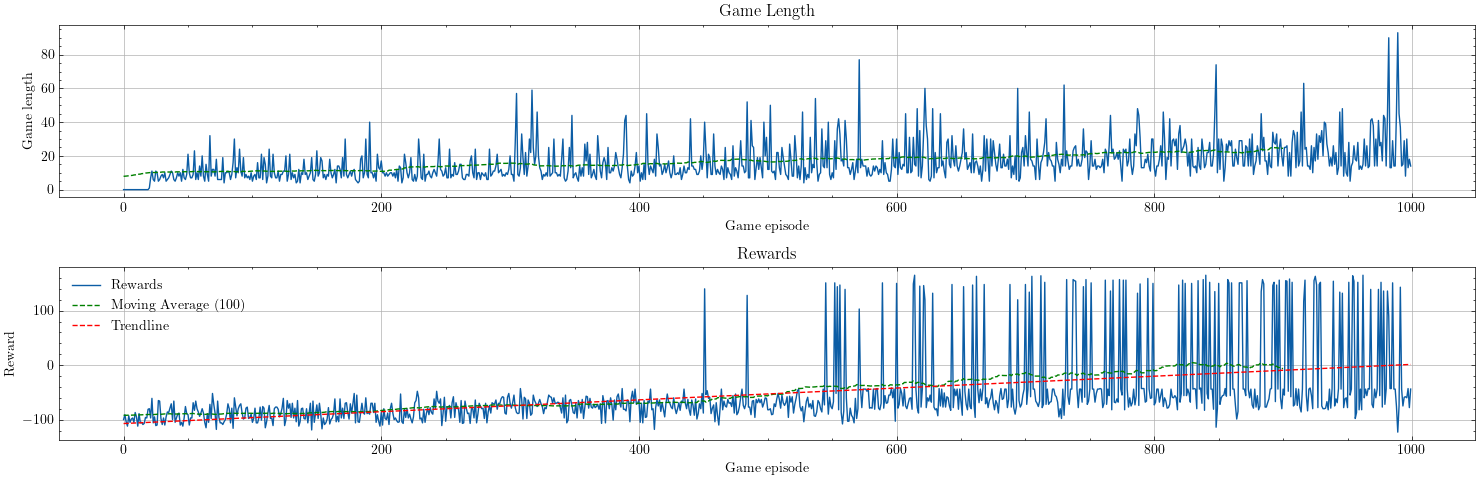

In [8]:
plt.figure(figsize=(15, 8))
plt.subplot(211)
plt.plot(gameLength)
plt.plot(gameLengthMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Game Length')
plt.xlabel('Game episode')
plt.ylabel('Game length')
plt.grid()

plt.subplot(212)
plt.plot(rewards, label = 'Rewards')
plt.plot(rewardsMA, 'g--', label=f'Moving Average ({window_size})')
plt.title('Rewards')
plt.xlabel('Game episode')
plt.ylabel('Reward')
plt.grid()

# trendline
z = np.polyfit(np.arange(len(rewards)), rewards, 1)
p = np.poly1d(z)
plt.plot(p(np.arange(len(rewards))), 'r--', label='Trendline')
plt.legend()

plt.tight_layout()
plt.show()

